In [1]:
########### WELCOME TO BROWNIAN MOTION! ############

import numpy as np                # 파이썬의 기본 수학 연산 패키지
import matplotlib.pyplot as plt   # 벡터 및 행렬 연산을 위한 패키지
import pandas as pd               # 데이터를 분석하고 다루는 패키지
# !pip install finance-datareader
import FinanceDataReader as fdr

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def boxcount(s,ep):               # 프랙탈 차원 계산을 위한 함수들
  xlen=len(s)
  xgap=np.int(ep*xlen)
  if xgap<2:
    return -1
  boxn=0
  for i in range(0, np.int(xlen/xgap)):
    st=i*xgap
    ed=np.min([(i+1)*xgap,xlen])
    boxn=boxn+np.ceil((np.max(s[st:ed])-np.min(s[st:ed]))/ep)
  return boxn

def boxdim(s):
  bd=np.array([])
  for k in range(0,20):
    ep=1/2**k
    bn=boxcount(s,ep)
    if bn==-1:
      break
    print(bn)  
    bd=np.append(bd,np.log(bn)/np.log(1/ep))
  plt.plot(bd)

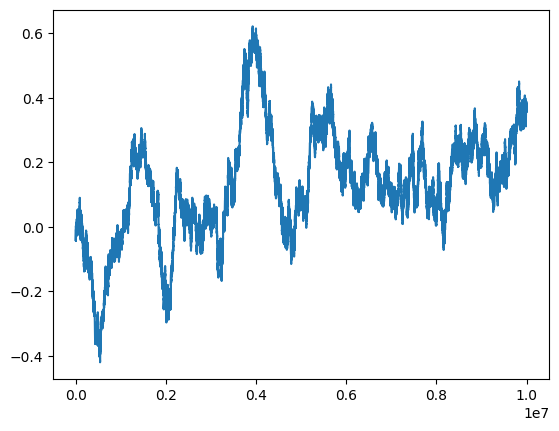

In [3]:
############# 브라운 운동의 프랙탈 차원을 구해봅시다! ###############

def Brownian(n):                  # 기본 브라운 운동
  dt=1/n
  dB=np.sqrt(dt)*np.random.randn(n)
  B=np.cumsum(dB)
  return B

s1=Brownian(10000000)
plt.plot(s1)

2.0
5.0
12.0
38.0
110.0
296.0
802.0
2288.0
6532.0
18476.0
52747.0
147841.0
414712.0
1163933.0
3266385.0
9102942.0
25252191.0
69481433.0
188110458.0
497907825.0


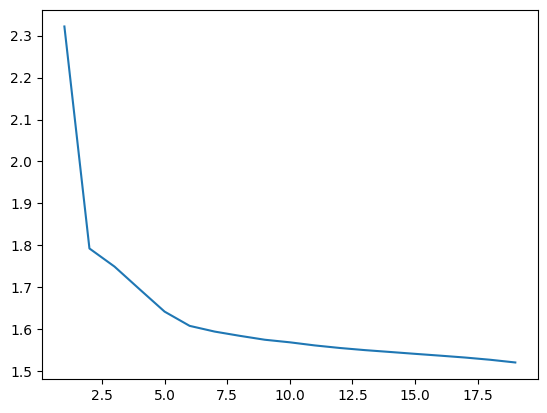

In [4]:
boxdim(s1)

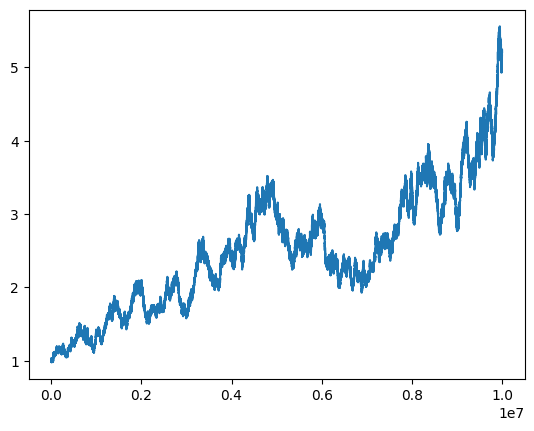

In [5]:
############# 기하(Geometric) 브라운 운동의 프랙탈 차원을 구해봅시다! ###############

def GeoBrownian(n):               # 기하 브라운 운동
  mu=2
  sigma=1
  dt=1/n
  dB=np.sqrt(dt)*np.random.randn(n)
  B=np.cumsum(dB)

  t=np.arange(dt, 1+dt, dt)
  Y0=1
  Y=Y0*np.exp((mu-0.5*sigma**2)*t + sigma*B)
  return Y

s2=GeoBrownian(10000000)
plt.plot(s2)

5.0
14.0
31.0
83.0
249.0
722.0
2080.0
5827.0
16402.0
45915.0
130292.0
366102.0
1029359.0
2895451.0
8082100.0
22552156.0
62619034.0
172239246.0
466646619.0
1235911989.0


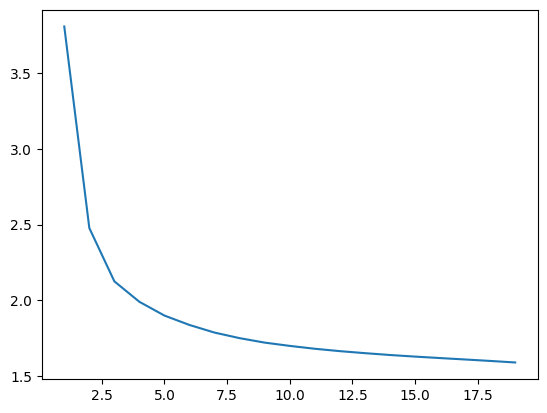

In [6]:
boxdim(s2)

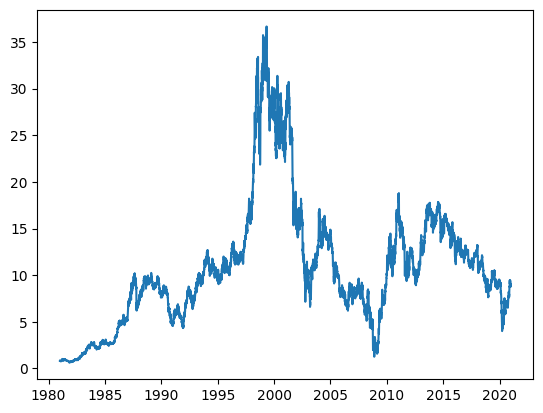

In [7]:
############# 실제 주식 데이터 그래프의 프랙탈 차원을 구해봅시다! ###############

stock = fdr.DataReader('F','1981-01-01', '2020-12-30')
s3=stock['Close']                 # 'Ford(포드)'사의 1981~2020년도 까지의 실제 주식값을 불러옵니다
plt.plot(s3)

37.0
132.0
347.0
842.0
2280.0
5964.0
16933.0
44632.0
123733.0
323380.0
833110.0
1951085.0
3455494.0


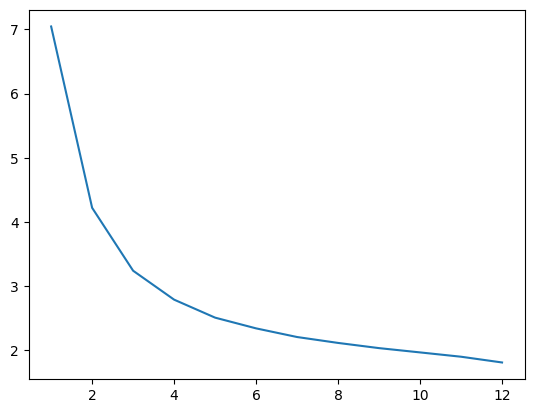

In [8]:
boxdim(s3)